### MNIST
Author: Bharadwaj Naidu Muthuluru <br>
Inspired From: Hands on ML Text book


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
x, y = mnist["data"], mnist["target"]
x.shape
y.shape

(70000, 784)

(70000,)

In [4]:
y

array([0., 0., 0., ..., 9., 9., 9.])

It is a 28 pixel * 28 pixel images with only intensity. 0 intensity represents white and 255 represents black
Let's look at one of the data points by reconstructing and %matplotlib

In [5]:
# Importing matplotlib
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

(-0.5, 27.5, 27.5, -0.5)

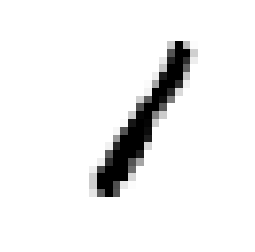

The label is 0.0


In [6]:
%matplotlib inline
x_sample = x[9989]
x_image = x_sample.reshape(28,28)

plt.imshow(x_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print("The label is "+ str(y[566]))

In [7]:
# Splitting into test-train
# MNIST dataset is already split into train-test, so we can simply use the array wise assignment as below
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [8]:
# Let us shuffle the dataset to avoid similar instances being together
# Some learning algorithms are sensitive to the order of the training instances and 
# they perform poorly if they get many similar instances in a row

import numpy as np

shuffle_index = np.random.permutation(60000)
x_train,y_train =  x_train[shuffle_index],y_train[shuffle_index]

###### Binary Classifier

In [12]:
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)

In [13]:
y_train_0

array([False, False, False, ..., False, False, False], dtype=bool)

In [14]:
#Trial 1: SGDClassifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=999)
sgd_clf.fit(x_train,y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=999, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([x_sample])
#So it is able to the predict the sample correctly

array([False], dtype=bool)

###### Performance Measures

In [16]:
# Let us implement Cross-validation using sklearn sometimes the cross_val-score func might not be flexible enough for our needs

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=999)

for train_index, test_index in skfolds.split(x_train, y_train_0):
    clone_clf = clone(sgd_clf)
    x_train_folds, y_train_folds, x_test_folds, y_test_folds = x_train[train_index], y_train_0[train_index], x_train[test_index], y_train_0[test_index]
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=999, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.98785060747


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=999, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.98825


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=999, shuffle=True,
       tol=None, verbose=0, warm_start=False)

0.989749487474


In [17]:
# using the cross_val_score function

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_0, cv =3, scoring = "accuracy")

array([ 0.98785061,  0.98825   ,  0.98974949])

Accuracy values looks good. However let's compare with a base/dumb classifier mdoel

In [18]:
from sklearn.base import BaseEstimator

class Never0Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [19]:
never_0_clf = Never0Classifier()
cross_val_score(never_0_clf, x_train, y_train_0, cv=3, scoring="accuracy")

array([ 0.90395,  0.89775,  0.90215])

This shows why accuracy is generally not the best metric to measure performance of classifiers, especially when dealing with skewed datasets. 

In [25]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
# Below function (cross_val_predict) will give us clean prediction i.e. the prediction from the model built 
#on the data it is not trained from
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_0, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[53848,   229],
       [  454,  5469]], dtype=int64)

In [26]:
# To determine denominators in Precision & Recall
# perfect predictions
y_train_perfect_predictions = y_train_0
confusion_matrix(y_train_0, y_train_perfect_predictions)

array([[54077,     0],
       [    0,  5923]], dtype=int64)

In [27]:
# Precision and Recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred)
recall_score(y_train_0, y_train_pred)

0.95981045981045976

0.92334965389160895

In [28]:
# F1 score
# We use f1 score (Harmonic mean) over Arthimetic mean because AM gives equal importance to both of them 
# where as f1 score use more importance to low values of the 2

from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.94122708889080109

Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

Quote from the TextBook

In [29]:
# By changing threshold we can get different precision & recall values with the same model. 
# However Scikit-learn doesn't allow us to change the threshold directly however it allows us to 
# change the decision scores that it uses to make predictions
y_scores = sgd_clf.decision_function([x_sample])
print(y_scores)
threshold = 0
y_pred = (y_scores > threshold)
y_pred
threshold = 62000
y_pred = (y_scores > threshold)
y_pred

[-559346.6266526]


array([False], dtype=bool)

array([False], dtype=bool)

In [30]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_0, cv=3, method = "decision_function")

In [31]:
# PR Curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

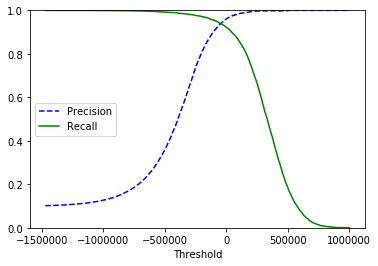

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Recall will keep on increasing as we decrease the threshold, so the recall curve is usually smoother. However precision usually increases as threshold increases however it might decrease at few exceptions

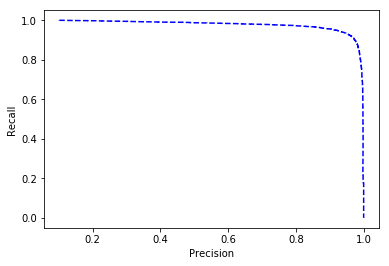

In [33]:
def plot_precision_recall(precisions, recalls):    
    plt.plot(precisions, recalls, 'b--')
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.show
plot_precision_recall(precisions,recalls)

In [34]:
# Let us say we want precision of 0.9
y_train_pred_90 = (y_scores >100000)  
precision_score(y_train_0, y_train_pred_90)
recall_score(y_train_0, y_train_pred_90)


0.98383682893977298

0.86324497720749616

In [35]:
# ROC Curve is a plot between Sensitivity(Recall) and 1-specificity
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

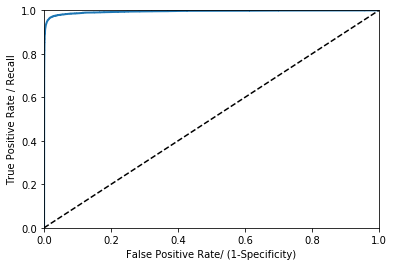

In [36]:
def plot_roc_curve(fpr,tpr,label=None):
    # Curve
    plt.plot(fpr,tpr, linewidth=2, label=label)
    # Diagonal Line
    plt.plot([0,1],[0,1], 'k--')
    #Axis
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate/ (1-Specificity)')
    plt.ylabel('True Positive Rate / Recall')
    
plot_roc_curve(fpr,tpr,"ROC-Curve")
plt.show()

In [37]:
# AUC i.e Area Under the Curve of ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.99441683805832226

Since the ROC curve is so similar to the precision/recall (or PR) curve, we may wonder how to decide which one to use. As a rule of thumb, we should prefer the PR curve whenever the positive class is rare or when we care more about the false positives than the false negatives, and the ROC curve otherwise. For example, looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has room for improvement (the curve could be closer to the top-right corner).

##### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier 

forest_clf = RandomForestClassifier(random_state=999)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_0, cv=3, method = 'predict_proba' )


In [39]:
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

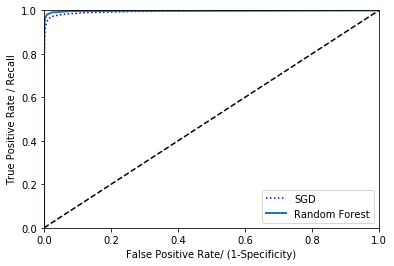

0.99757624359842001

In [40]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_0, y_scores_forest)

###### Multiclass Classification

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that we can use to perform multiclass classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [41]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([x_sample])
sgd_clf.predict(x_sample.reshape(1,-1))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=999, shuffle=True,
       tol=None, verbose=0, warm_start=False)

array([ 1.])

array([ 1.])

In [42]:
x_sample_scores = sgd_clf.decision_function([x_sample])
x_sample_scores
np.argmax(x_sample_scores)
sgd_clf.classes_
sgd_clf.classes_[np.argmax(x_sample_scores)]

array([[-559346.6266526 ,   89234.99654465,  -66978.66167301,
        -255547.52084877, -272591.91623159, -265397.22938381,
        -291737.15593161, -292008.42124598, -113473.89426257,
        -431871.23574777]])

1

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

1.0

    ##### Note: 
When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class 5), but in general you won’t be so lucky.

##### Force Scikit Learn to use one-versus-one or one-versus-all
If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier:

In [7]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=999))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([x_sample])
len(ovo_clf.estimators_)

NameError: name 'SGDClassifier' is not defined

In [44]:
# Training a RF clf
forest_clf.fit(x_train, y_train)
forest_clf.predict([x_sample])
forest_clf.predict_proba([x_sample])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

array([ 1.])

array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [45]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")
cross_val_score(forest_clf, x_train, y_train, cv=3, scoring="accuracy")


array([ 0.84968006,  0.86419321,  0.86107916])

array([ 0.94456109,  0.93814691,  0.94129119])

It gets over 84% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs (as discussed in Chapter 2) increases accuracy above 90%:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled, y_train, cv=3, scoring ="accuracy")

Of course, if this were a real project, you would follow the steps in your Machine Learning project checklist (see Appendix B): exploring data preparation options, trying out multiple models, shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV, and automating as much as possible, as you did in the previous chapter. Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes.

##### Ways to improve the model
Step 1: Understand where the model is not performing well

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,x_train_scaled, y_train, cv=3)
Conf_mx = confusion_matrix(y_train, y_train_pred)
Conf_mx

plt.matshow(Conf_mx, cmap=plt.cm.gray)
plt.show()

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad):

In [ ]:
row_sums = Conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = Conf_mx /row_sums

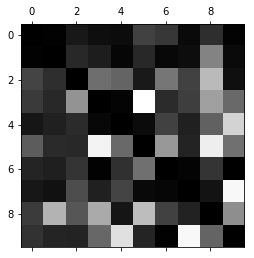

In [188]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on improving classification of 8s and 9s, as well as fixing the specific 3/5 confusion. For example, you could try to gather more training data for these digits. Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as closed loops.

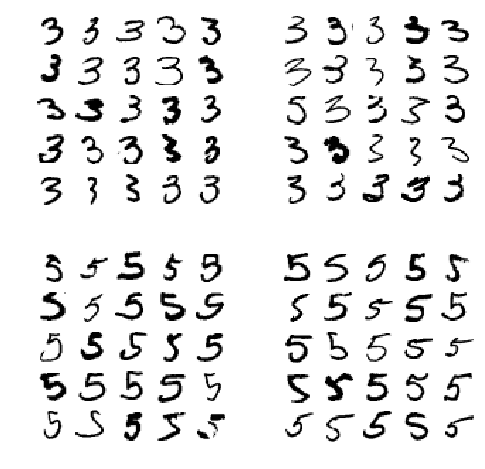

In [194]:
cl_a, cl_b = 3, 5
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [193]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

###### Multilabel Classification

 In some cases you may want your classifier to output multiple classes for each instance. For example, consider a face-recognition classifier: what should it do if it recognizes several people on the same picture? Of course it should attach one label per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary labels is called a multilabel classification system.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
knn_clf.predict([x_sample])

array([[False,  True]], dtype=bool)

There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. For example, one approach is to measure the F1 score for each individual label (or any other binary classifier metric discussed earlier), then simply compute the average score. This code computes the average F1 score across all labels:

In [ ]:
y_train_knn_pred = cross_val_score(knn_clf, x_train, y_multilabel, cv=3, )
f1_score(y_multilabel, y_train_knn_pred, average="macro")
#average = "weighted" will keep support of each class as the importance

###### MultiOutput Classification
It is simply a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).

In [37]:
noise = np.random.randint(0, 100, (len(X_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
x_test_mod =x_test + noise
y_train_mod = x_train
y_test_mod = x_test

NameError: name 'X_train' is not defined

In [38]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

NameError: name 'X_train_mod' is not defined

Looks close enough to the target! This concludes our tour of classification. Hopefully you should now know how to select good metrics for classification tasks, pick the appropriate precision/recall tradeoff, compare classifiers, and more generally build good classification systems for a variety of tasks.

In [66]:
import cv2
gray = cv2.imread("6.png")

In [78]:
from PIL import Image 
image_file = Image.open("6.png") # open colour image
image_file = image_file.convert("1") # convert image to black and white
image_file.save('result.png')

In [107]:
x_6 = imread("result.png").reshape(784)
x_6 = np.array(x_6)
x_6.shape
x_sample.shape

(784,)

(784,)

In [108]:
sgd_clf.predict(x_6.reshape(1,-1))

array([False], dtype=bool)

In [120]:
image_file = Image.open("0..png") # open colour image
image_file = image_file.convert("L") # convert image to black and white
image_file.save('result.png')
x_6 = imread("result.png").reshape(784)
x_6 = np.array(x_6)
x_6.shape
x_sample.shape
sgd_clf.predict(x_6.reshape(1,-1))

(784,)

(784,)

array([False], dtype=bool)

(-0.5, 27.5, 27.5, -0.5)

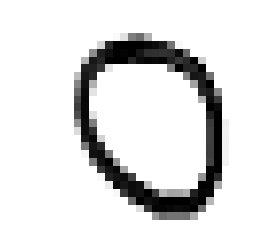

The label is 0.0


In [121]:
%matplotlib inline
x_image = x_6.reshape(28,28)

plt.imshow(x_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print("The label is "+ str(y[566]))